In [4]:
# problem1.1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#读取数据
Sig_Eqs = pd.read_csv('earthquakes-2022-10-25_11-30-06_+0800.tsv',sep='\t')
#将数据按country分类后求death总数后排序
Sig1=Sig_Eqs.groupby(['Country']).sum()['Deaths'].reset_index().sort_values('Deaths',ascending=False).reset_index(drop=True)
#序号从1开始重新标号
Sig1.index=Sig1.index+1
#输出最大的20个
print(Sig1.head(20))

         Country     Deaths
1          CHINA  2075019.0
2         TURKEY  1134569.0
3           IRAN  1011446.0
4          ITALY   498477.0
5          SYRIA   439224.0
6          HAITI   323474.0
7     AZERBAIJAN   317219.0
8          JAPAN   278142.0
9        ARMENIA   191890.0
10      PAKISTAN   145083.0
11          IRAQ   136200.0
12       ECUADOR   135479.0
13  TURKMENISTAN   117412.0
14          PERU   102219.0
15        ISRAEL    90388.0
16      PORTUGAL    83531.0
17        GREECE    79174.0
18         CHILE    64276.0
19         INDIA    63491.0
20        TAIWAN    57135.0


<AxesSubplot:xlabel='Year'>

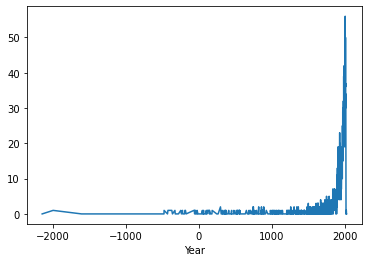

In [5]:
#problem1.2
#将Ms大于3.0的赋值n=1，最后求和
Sig_Eqs.loc['n']=0
Sig_Eqs.loc[Sig_Eqs['Ms']>3.0,'n']=1
Sig_Eqs.groupby(['Year']).sum()['n'].plot()
#年份早期Ms大于3.0的地震记录较少，没有什么趋势，中后期随着时间推移大于Ms3.0的个数波动幅度增大，且顶峰不断上升。

In [6]:
#problem1.3
#读取文件数据
Sig_Eqs0 = pd.read_csv('earthquakes-2022-10-25_11-30-06_+0800.tsv',sep='\t')
#定义求总地震数目的列为1
Sig_Eqs0['the total number of earthquakes']=1
#求出各个country的地震总数
Sig2=Sig_Eqs0.groupby(['Country']).sum()['the total number of earthquakes'].reset_index()
#求出各个国家的地震最大Ms
Sig3=Sig_Eqs0.groupby(['Country']).max()['Ms'].reset_index()
#通过链接得到最大Ms所对应的时间及地点
Sig4=pd.merge(Sig3,Sig_Eqs0)[['Country','Location Name','Year','Mo','Dy','Hr']]
#将各个国家的地震总数和最大Ms对应的相关数据通过国家链接在一起，sig6其实就是下一步要求的结果
Sig6=pd.merge(Sig2,Sig4).sort_values('the total number of earthquakes',ascending=False)
#函数如下，按输入国家找到Sig6中数据输出即所求结果
def CountEq_LargestEq(x):
    return(Sig6[Sig6['Country']==x])
#将函数应用于全部国家，先求一个便于保证格式
C=CountEq_LargestEq('CHINA')
#得到国家列表
A=list(Sig1['Country'])
#遍历国家列表返回函数结果
for i in A[1:]:
    C=pd.concat([C,CountEq_LargestEq(i)])
print(C.sort_values('the total number of earthquakes',ascending=False).reset_index(drop=True))

       Country  the total number of earthquakes  \
0        CHINA                              616   
1        JAPAN                              411   
2        JAPAN                              411   
3    INDONESIA                              405   
4         IRAN                              384   
..         ...                              ...   
229  SRI LANKA                                1   
230    URUGUAY                                1   
231    BELGIUM                                1   
232      SUDAN                                1   
233     ZAMBIA                                1   

                                   Location Name    Year    Mo    Dy    Hr  
0        CHINA:  GANSU PROVINCE, SHANXI PROVINCE  1920.0  12.0  16.0  12.0  
1                                JAPAN:  SANRIKU   869.0   7.0  13.0   NaN  
2                               JAPAN:  NANKAIDO   887.0   8.0  26.0   NaN  
3    INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST  2004.0  12.0  26.0   0.0  
4 

C:\Users\19693\AppData\Local\Temp\ipykernel_28364\3179450281.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  Sig3=Sig_Eqs0.groupby(['Country']).max()['Ms'].reset_index()


C:\Users\19693\AppData\Local\Temp\ipykernel_85960\2611724721.py:6: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Baoan_Weather = pd.read_csv('Baoan_Weather_1998_2022.csv')
C:\Users\19693\AppData\Local\Temp\ipykernel_85960\2611724721.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baoan_Weather1['DATE']=pd.to_datetime(Baoan_Weather1['DATE'],format='%Y/%m/%d %H:%M:%S',errors='coerce')
C:\Users\19693\AppData\Local\Temp\ipykernel_85960\2611724721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<AxesSubplot:xlabel='x'>

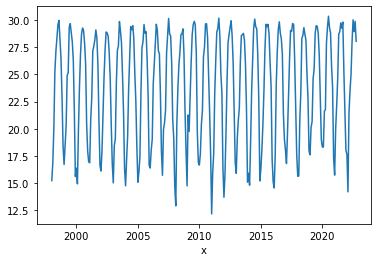

In [4]:
#problem2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#输入数据
Baoan_Weather = pd.read_csv('Baoan_Weather_1998_2022.csv')
#挑取需要数据
Baoan_Weather1=Baoan_Weather[['DATE','TMP']]
#得到时间年月，生成年月主导的列x【年份+（月份-1）/12】用来绘图
Baoan_Weather1['DATE']=pd.to_datetime(Baoan_Weather1['DATE'],format='%Y/%m/%d %H:%M:%S',errors='coerce')
Baoan_Weather1['Year']=Baoan_Weather1['DATE'].dt.year
Baoan_Weather1['Mo']=Baoan_Weather1['DATE'].dt.month
Baoan_Weather1['x']=Baoan_Weather1['Year']+(Baoan_Weather1['Mo']-1)/12
#得到温度，结尾是3和7的不取，’999，9‘的不取,全部为0.后续再去除
Baoan_Weather1['TMP'][(Baoan_Weather1['TMP'].str[-1]=='3')|(Baoan_Weather1['TMP'].str[-1]=='7')|(Baoan_Weather1['TMP'].str[2:]=='999,9')]=0
Baoan_Weather1['TMP'][(Baoan_Weather1['TMP'].str[-1]!='3')&(Baoan_Weather1['TMP'].str[-1]!='7')&(Baoan_Weather1['TMP'].str[2:]!='999,9')]=Baoan_Weather1['TMP'].str[2:4]+'.'+Baoan_Weather1['TMP'].str[4:5]
Baoan_Weather1['TMP']=Baoan_Weather1['TMP'].astype(float)
Baoan_Weather1[Baoan_Weather1['TMP']!=0].groupby('x').mean()['TMP'].plot()
#过去的25年里一年内月平均气温整体趋势相似（存在一定周期性，都由年初升温到最高点后下降到年末），区间在30到15之间，部分年份存在更低的温度。

In [5]:
#problem3(检查输入)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#读取数据
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 1],  
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME',' '])
df.head()

C:\Users\19693\AppData\Local\Temp\ipykernel_85960\3039061241.py:6: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN,NaN,main,43,0.0,__________O___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___


In [6]:
#problem3.1
#先排列所有风速，再按SID分组取第一个就是SID内最大值，再返回前10个
df.sort_values('WMO_WIND',ascending=False).groupby('SID').head(1).head(10)[['SID','NAME','WMO_WIND']]

,SID,NAME,WMO_WIND
665955,2015293N13266,PATRICIA,185.0
427637,1980214N11330,ALLEN,165.0
178213,1935241N23291,NaN,160.0
552460,1997253N12255,LINDA,160.0
605747,2005289N18282,WILMA,160.0
482075,1988253N12306,GILBERT,160.0
689333,2019236N10314,DORIAN,160.0
604983,2005261N21290,RITA,155.0
560438,1998295N12284,MITCH,155.0
676152,2017242N16333,IRMA,155.0


<AxesSubplot:xlabel='SID'>

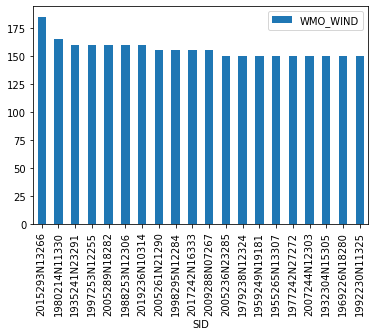

In [7]:
#problem3.2
#先排列所有风速，再按SID分组取第一个就是SID内最大值，再返回前20个进行绘图
df.sort_values('WMO_WIND',ascending=False).groupby('SID').head(1).head(20).plot(kind='bar',x='SID',y='WMO_WIND')

<AxesSubplot:>

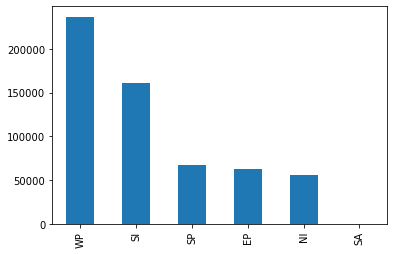

In [8]:
#problem3.3
#直接计算不同BASIN对应个数
df['BASIN'].value_counts().plot(kind='bar')

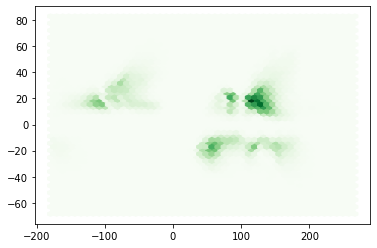

In [9]:
#problem3.4
#用数据的经纬度进行绘图
plt.hexbin(df['LON'],df['LAT'], gridsize = 50, cmap ='Greens') 

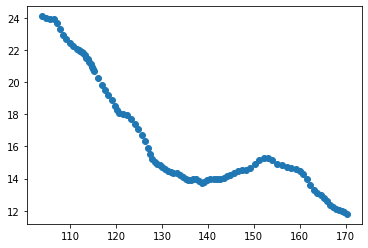

In [10]:
#problem3.5
#筛选需要数据，即台风名和年份符合的数据
df1=df[['LON','LAT']][(df['NAME']=='MANGKHUT')&(df['SEASON']==2018)]
plt.scatter(df1['LON'],df1['LAT']) 

In [11]:
#problem3.6
#选取数据
df_6=df[((df['BASIN']=='WP')|(df['BASIN']=='EP'))&(df['SEASON']>=1970)]
df_6

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,NaN,NaN,PROVISIONAL,0,0.0,P_____________
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,NaN,NaN,PROVISIONAL,0,NaN,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


C:\Users\19693\AppData\Local\Temp\ipykernel_85960\1928485141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6.rename(index=df_6['ISO_TIME'],inplace=True)
C:\Users\19693\AppData\Local\Temp\ipykernel_85960\1928485141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['n']=1


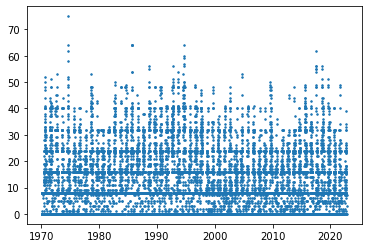

In [12]:
#problem3.7
#将时间赋予index，resample用法来自于陈禹凡讲解
df_6.rename(index=df_6['ISO_TIME'],inplace=True)
#为了便于求总的计数
df_6['n']=1
#按day求和计数点
df_7=df_6.resample('D').sum()['n']
plt.plot_date(df_7.index,df_7,markersize=1.5)

In [31]:
#problem3.8
#创建一个新的datafram，列d为一年年中第几天，ddd为对应每个台风数据点数
ddf=pd.DataFrame(columns=['d','ddd'])
for i in range(len(df_7.index)):
    #将每个数据对应的日期转变成每年的第几天的形式
    t=int(df_7.index[i].timetuple().tm_yday)
    ddf.loc[df_7.index[i],['d']]=t
    #将每个台风数量点数量导入
    ddf.loc[df_7.index[i],['ddd']]=df_7[i]
#按年中天分类然后求所有年份这个天的总数和
ddff=ddf.groupby('d').sum()['ddd'].reset_index()
def day_of_year(day):
    #在dddff中寻找到年中天一样的数然后返回
    return int(ddff['ddd'][ddff['d']==day])
#举例
day_of_year(1)

83

In [35]:
#problem3.9
#陈禹凡向我解释了题目意思
#创建ddfff为一年中第几天（d）对应多少个年（d对应的ddd的个数）的datafram
ddfff=ddf.groupby('d').count()['ddd'].reset_index()
def s(day):
    #在dddff中寻找到年中天一样的数然后返回
    return int(ddfff['ddd'][ddfff['d']==day])
#得到366天内每天的年个数
xx=[]
for i in range(0,366):
    xx.append(day_of_year(i+1)/s(i+1))
#建立输出结果y
y=pd.DataFrame(columns=['anomaly'])
#将全部的数据遍历
for j in range(len(df_7.index)):
    #时间转化成一年的第几天
    t=int(df_7.index[j].timetuple().tm_yday)
    #将各个时间点对应的值减去多年每日平均
    y.loc[df_7.index[j],['anomaly']]=df_7[j]-xx[t-1]
y

,anomaly
1970-02-19,7.018868
1970-02-20,7.09434
1970-02-21,7.188679
1970-02-22,7.377358
1970-02-23,7.490566
...,...
2022-10-08,-17.245283
2022-10-09,-17.301887
2022-10-10,-12.396226
2022-10-11,-18.528302


2010-12-31   -4.570616
Name: anomaly, dtype: float64
1992-12-31    4.537501
1994-12-31    4.415686
Name: anomaly, dtype: float64


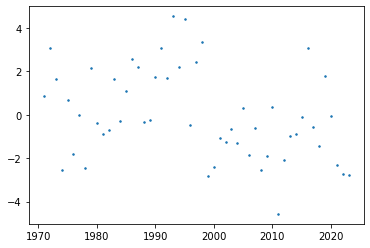

In [36]:
#problem3.10
#求各年的平均anomaly进行绘图
df_10=y.resample('Y').mean()['anomaly'].sort_values()
#找到低于均值最多的点为2010年
print(df_10.sort_values().head(1))
#找到明显过多的点为1992年和1994年
print(df_10.sort_values(ascending=False).head(2))
plt.plot_date(df_10.index,df_10,markersize=1.5)
#整体分布沿均值对称，较分散跨度大，最少的低于均值-4.57的2010年，分别高于均值4.53和4.41的1992年和1994年。

In [1]:
#problem4.1
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
#读取数据HANGZHOU, CH (CHM00058457)的data.csv
df = pd.read_csv('data.csv',  
                 parse_dates=['Date'],
                 na_values=[' '])
df.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1951-01-01,NaN,56.0,30.0,0.00,NaN,NaN
1,1951-01-02,44.0,46.0,42.0,0.06,NaN,NaN
2,1951-01-03,45.0,49.0,41.0,0.00,NaN,NaN
3,1951-01-04,44.0,58.0,34.0,0.00,NaN,NaN
4,1951-01-05,50.0,61.0,42.0,0.00,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='TAVG (Degrees Fahrenheit)'>

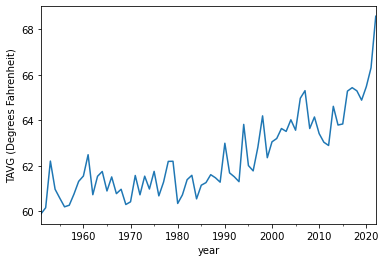

In [2]:
#problem4.2
df.rename(index=df['Date'],inplace=True)
#绘制年均气温TAVG (Degrees Fahrenheit)随年份变化折线图，因为部分数据缺失，因此求年最高最低气温可能误差较大，且降雨相比于气温存在大波动（缺失的话误差大）
df.resample('Y').mean()['TAVG (Degrees Fahrenheit)'].plot(xlabel='year',ylabel='TAVG (Degrees Fahrenheit)')
#2022年均气温上升剧烈是由于2022年统计数据到10月，缺失后续低温部分

In [3]:
#problem4.3
#陈禹凡讲解题意及思路
#将数据Date生成年份列
df['year']=pd.to_datetime(df['Date']).dt.year
#求1951-2022年日均温度
meanday=df.mean()['TAVG (Degrees Fahrenheit)']
#求1951-2022年平均温度的平均值
meanyday=df.groupby(['year']).mean()['TAVG (Degrees Fahrenheit)'].mean()
#求1951-2022年平均气温的最大值
maxyday=df.groupby(['year']).mean()['TAVG (Degrees Fahrenheit)'].max()
#求1951-2022年平均气温的方差
varyday=df.groupby(['year']).mean()['TAVG (Degrees Fahrenheit)'].var()
from scipy import stats
#进行正态检验
s,p=stats.shapiro(df.resample('Y').mean()['TAVG (Degrees Fahrenheit)'])
#s为检验统计量，当p大于显著性水平0.5时成立
print(' 1951-2022年日均温度 ',meanday,'\n','1951-2022年年平均温度的平均值',meanyday,'\n','1951-2022年年平均气温的最大值',maxyday,'\n','1951-2022年年平均气温的方差',varyday,'\n','正态性检验s，p',s,p)
#1951-2022年日均温度为62.341，1951-2022年年平均温度的平均值为62.358，两者差别不大，说明不同年份温度之间的分布不可能关于均值对称
#年平均温度的最高平均气温和平均温度差别较大且方差不小，则不同年份温度波动可能较大
#p>0.5，该数据分布不具备正态性

C:\Users\19693\AppData\Local\Temp\ipykernel_28364\3442535950.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  meanday=df.mean()['TAVG (Degrees Fahrenheit)']


 1951-2022年日均温度  62.34089609151573 
 1951-2022年年平均温度的平均值 62.35783603718997 
 1951-2022年年平均气温的最大值 68.56756756756756 
 1951-2022年年平均气温的方差 3.111066977478422 
 正态性检验s，p 0.9156979322433472 0.00013834991841576993
